In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arkaprabha1012","key":"f07b1a3ffd2b86f82a0788e5e9dc8dfe"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              221KB  2021-03-26 07:27:32            987  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            755  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            697  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            298  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [8]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:06<00:00, 15.3MB/s]
100% 163M/163M [00:06<00:00, 27.6MB/s]


In [12]:
!unzip /content/face-mask-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [9]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions,ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential,Model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
pip install split-folders tqdm

In [13]:
import splitfolders  # or import split_folders
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.

splitfolders.ratio("/content/data", output="Output", seed=1337, ratio=(.6,.2,.2), group_prefix=None) # default values
# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
#splitfolders.fixed("/content/susmitadipluskaggle", output="Output", seed=1337, fixed=(70,70), oversample=False, group_prefix=None) # default values


Copying files: 0 files [00:00, ? files/s]
Copying files: 196 files [00:00, 1959.66 files/s]
Copying files: 770 files [00:00, 2441.68 files/s]
Copying files: 1207 files [00:00, 2813.61 files/s]
Copying files: 1646 files [00:00, 3153.28 files/s]
Copying files: 2177 files [00:00, 3590.64 files/s]
Copying files: 2766 files [00:00, 4066.34 files/s]
Copying files: 3377 files [00:00, 4518.80 files/s]
Copying files: 3875 files [00:00, 4058.86 files/s]
Copying files: 4379 files [00:00, 4310.00 files/s]
Copying files: 4863 files [00:01, 4456.08 files/s]
Copying files: 5333 files [00:01, 3716.09 files/s]
Copying files: 5743 files [00:01, 3416.05 files/s]
Copying files: 6116 files [00:01, 3227.18 files/s]
Copying files: 6584 files [00:01, 3558.21 files/s]
Copying files: 7045 files [00:01, 3819.51 files/s]
Copying files: 7553 files [00:01, 4127.52 files/s]


In [14]:
img_height,img_width=(228,228)
batch_size=128
train_data_dir="/content/Output/train"
valid_data_dir="/content/Output/val"
!rmdir "/content/Output/train/.ipynb_checkpoints/"
!rmdir "/content/Output/val/.ipynb_checkpoints/"
test_data_dir="/content/Output/test"

rmdir: failed to remove '/content/Output/train/.ipynb_checkpoints/': No such file or directory
rmdir: failed to remove '/content/Output/val/.ipynb_checkpoints/': No such file or directory


In [49]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle='False')
valid_generator=train_datagen.flow_from_directory(valid_data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle='False')
print(valid_generator.class_indices)
print(train_generator.class_indices)
#train_generator.classes = np.asarray(train_generator.classes).astype('float32').reshape((-1,1))
#valid_generator.classes = np.asarray(valid_generator.classes).astype('float32').reshape((-1,1))

Found 4531 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.
{'with_mask': 0, 'without_mask': 1}
{'with_mask': 0, 'without_mask': 1}


In [50]:
#new model for resnet
from tensorflow import keras
from tensorflow.keras import layers
base_model=ResNet50(include_top=False,
                    weights='imagenet')
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
predictions=Dense(train_generator.num_classes,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=predictions)
for layer in base_model.layers:
  layer.trainable=False
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [51]:
from keras.callbacks import ModelCheckpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list=[checkpoint]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/35 [=======>......................] - ETA: 48s - loss: 0.6465 - accuracy: 0.7287

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


35/35 [==============================] - 129s 3s/step - loss: 0.3534 - accuracy: 0.8651 - val_loss: 0.0296 - val_accuracy: 0.9883

Epoch 00001: val_accuracy improved from -inf to 0.98828, saving model to weights-improvement-01-0.99.hdf5
Epoch 2/10
35/35 [==============================] - 94s 3s/step - loss: 0.0231 - accuracy: 0.9933 - val_loss: 0.0323 - val_accuracy: 0.9891

Epoch 00002: val_accuracy improved from 0.98828 to 0.98906, saving model to weights-improvement-02-0.99.hdf5
Epoch 3/10
35/35 [==============================] - 94s 3s/step - loss: 0.0106 - accuracy: 0.9961 - val_loss: 0.0349 - val_accuracy: 0.9875

Epoch 00003: val_accuracy did not improve from 0.98906
Epoch 4/10
35/35 [==============================] - 93s 3s/step - loss: 0.0117 - accuracy: 0.9978 - val_loss: 0.0158 - val_accuracy: 0.9945

Epoch 00004: val_accuracy improved from 0.98906 to 0.99453, saving model to weights-improvement-04-0.99.hdf5
Epoch 5/10
35/35 [==============================] - 93s 3s/step - l

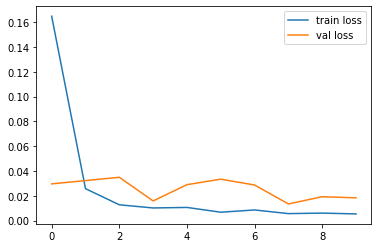

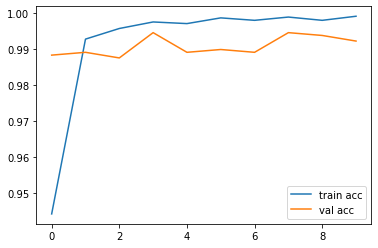

<Figure size 432x288 with 0 Axes>

In [52]:
#for new loaded model use new_model unless model
r = model.fit_generator(
  train_generator,
  epochs=10,
  steps_per_epoch=4531//(batch_size),
  validation_data=valid_generator,
  validation_steps=1310//(batch_size),callbacks=callbacks_list
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [53]:
test_generator=train_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle='False'
                                                  )
print(test_generator.class_indices)
model.save("facemask.h5")

Found 1512 images belonging to 2 classes.
{'with_mask': 0, 'without_mask': 1}


In [60]:
test_loss,test_acc=model.evaluate(test_generator,verbose=1)
print("Test accuracy:",test_acc)
print("Test Loss:",test_loss)
test_generator.shuffle=False
test_generator.reset()
Y_pred = model.predict_generator(test_generator,verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['With_mask','Without_mask']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))
cm=confusion_matrix(test_generator.classes, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("class specific accuracy:")
print(cm.diagonal())
acsa = (cm[0,0]/sum(cm[0,:])+cm[1,1]/sum(cm[1,:]))/2
print("average class specific accuracy :",acsa)
class_acc = [cm[i,i]/np.sum(cm[i,:]) if np.sum(cm[i,:]) else 0 for i in range(len(cm))]
print("class accuracy :",class_acc)
ppvs = [cm[i,i]/np.sum(cm[:,i]) if np.sum(cm[:,i]) else 0 for i in range(len(cm))]
print("predicted positive value :",ppvs)

 3/12 [======>.......................] - ETA: 16s - loss: 0.0393 - accuracy: 0.9922

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


12/12 [==============================] - 24s 2s/step - loss: 0.0266 - accuracy: 0.9940
Test accuracy: 0.9940476417541504
Test Loss: 0.026606310158967972


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


12/12 [==============================] - 24s 2s/step
Confusion Matrix
[[742   3]
 [  9 758]]
Classification Report
              precision    recall  f1-score   support

   With_mask       0.99      1.00      0.99       745
Without_mask       1.00      0.99      0.99       767

    accuracy                           0.99      1512
   macro avg       0.99      0.99      0.99      1512
weighted avg       0.99      0.99      0.99      1512

class specific accuracy:
[0.99597315 0.98826597]
average class specific accuracy : 0.9921195628396174
class accuracy : [0.9959731543624161, 0.9882659713168188]
predicted positive value : [0.9883557159454621, 0.9959418776708036]


1


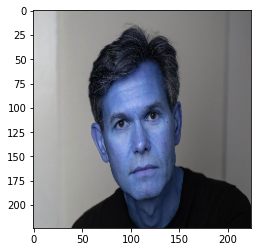

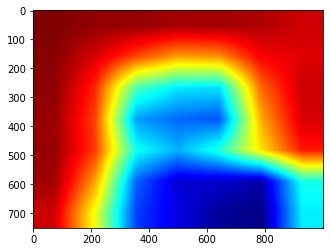

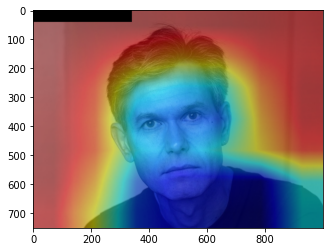

Without Mask : 99.99933242797852


In [65]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import imutils
import cv2
orig=cv2.imread("/content/image.jpg")
resized=cv2.resize(orig,(224,224))
import matplotlib.pyplot as plt
image=resized
image1=image.copy()
image=img_to_array(image)
image=np.expand_dims(image,axis=0)
preds=model.predict(image)
i=np.argmax(preds[0])
print(i)
if i==0:
  decision="Masked"
elif i==1:
  decision="Without Mask"
def decode_predictions(preds, top=1, class_list_path=None):
    import json
    if len(preds.shape) !=2:
        raise ValueError('`decode_predictions` expects '
                     'a batch of predictions '
                     '(i.e. a 2D array of shape (samples, 1000)). '
                     'Found array with shape: ' + str(preds.shape))
    #CLASS_INDEX = json.load(open(class_list_path))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result =pred[i]
        #result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results
# decode the ImageNet predictions to obtain the human-readable label
decoded = decode_predictions(preds,top=1,class_list_path=None)
decoded=decoded[0]*100
class gradcam:
  def __init__(self,model,classIdx,layername=None):
    self.model=model
    self.classIdx=classIdx
    self.layername=layername
    if self.layername is None:
      self.layername=self.find_target_layer()
  def find_target_layer(self):
    for layer in reversed(self.model.layers):
      if len(layer.output.shape)==4:
        return layer.name
    raise ValueError("COuld not find 4d layer")
  def compute_heatmap(self,image,eps=1e-8):
    gradModel=Model(inputs=[self.model.inputs],outputs=[self.model.get_layer(self.layername).output, self.model.output])
    with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
      inputs = tf.cast(image, tf.float32)
      (convOutputs, predictions) = gradModel(inputs)
      loss = predictions[:, self.classIdx]
    grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
    castConvOutputs = tf.cast(convOutputs > 0, "float32")
    castGrads = tf.cast(grads > 0, "float32")
    guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
    convOutputs = convOutputs[0]
    guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
    weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
    (w, h) = (image.shape[2], image.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
    numer = heatmap - np.min(heatmap)
    denom = (heatmap.max() - heatmap.min()) + eps
    heatmap = numer / denom
    heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
    return heatmap

  def overlay_heatmap(self, heatmap, image, alpha=0.5,colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
    heatmap = cv2.applyColorMap(heatmap, colormap)
    output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
    return (heatmap, output)
cam = gradcam(model, i)
heatmap = cam.compute_heatmap(image)
# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
#cv2.putText(output,label=, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
# display the original image and resulting heatmap and output image
# to our screen
#output = np.vstack([orig, heatmap, output])
#output = imutils.resize(output, height=700)
plt.imshow(image1)
plt.show()
plt.imshow(heatmap)
plt.show()
plt.imshow(output)
plt.show()
print(decision,":",decoded)

0


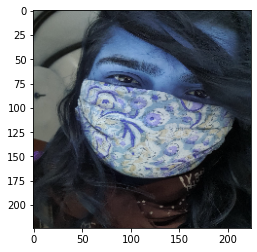

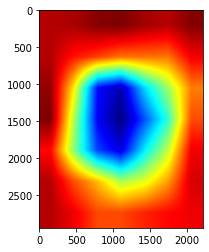

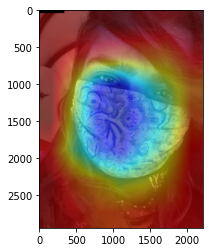

Masked : 99.99459981918335


In [67]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import imutils
import cv2
orig=cv2.imread("/content/facemask2.jpeg")
resized=cv2.resize(orig,(224,224))
import matplotlib.pyplot as plt
image=resized
image1=image.copy()
image=img_to_array(image)
image=np.expand_dims(image,axis=0)
preds=model.predict(image)
i=np.argmax(preds[0])
print(i)
if i==0:
  decision="Masked"
elif i==1:
  decision="Without Mask"
def decode_predictions(preds, top=1, class_list_path=None):
    import json
    if len(preds.shape) !=2:
        raise ValueError('`decode_predictions` expects '
                     'a batch of predictions '
                     '(i.e. a 2D array of shape (samples, 1000)). '
                     'Found array with shape: ' + str(preds.shape))
    #CLASS_INDEX = json.load(open(class_list_path))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result =pred[i]
        #result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results
# decode the ImageNet predictions to obtain the human-readable label
decoded = decode_predictions(preds,top=1,class_list_path=None)
decoded=decoded[0]*100
class gradcam:
  def __init__(self,model,classIdx,layername=None):
    self.model=model
    self.classIdx=classIdx
    self.layername=layername
    if self.layername is None:
      self.layername=self.find_target_layer()
  def find_target_layer(self):
    for layer in reversed(self.model.layers):
      if len(layer.output.shape)==4:
        return layer.name
    raise ValueError("COuld not find 4d layer")
  def compute_heatmap(self,image,eps=1e-8):
    gradModel=Model(inputs=[self.model.inputs],outputs=[self.model.get_layer(self.layername).output, self.model.output])
    with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
      inputs = tf.cast(image, tf.float32)
      (convOutputs, predictions) = gradModel(inputs)
      loss = predictions[:, self.classIdx]
    grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
    castConvOutputs = tf.cast(convOutputs > 0, "float32")
    castGrads = tf.cast(grads > 0, "float32")
    guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
    convOutputs = convOutputs[0]
    guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
    weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
    (w, h) = (image.shape[2], image.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
    numer = heatmap - np.min(heatmap)
    denom = (heatmap.max() - heatmap.min()) + eps
    heatmap = numer / denom
    heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
    return heatmap

  def overlay_heatmap(self, heatmap, image, alpha=0.5,colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
    heatmap = cv2.applyColorMap(heatmap, colormap)
    output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
    return (heatmap, output)
cam = gradcam(model, i)
heatmap = cam.compute_heatmap(image)
# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
#cv2.putText(output,label=, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
# display the original image and resulting heatmap and output image
# to our screen
#output = np.vstack([orig, heatmap, output])
#output = imutils.resize(output, height=700)
plt.imshow(image1)
plt.show()
plt.imshow(heatmap)
plt.show()
plt.imshow(output)
plt.show()
print(decision,":",decoded)